In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import emoji
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,LancasterStemmer,SnowballStemmer,wordnet
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
import pickle
import scipy.stats as ss
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv(r"C:\Users\srava\Downloads\archive (7)\apple_quality.csv")

In [3]:
# dropping null row
data.drop(4000,axis=0,inplace=True)

In [4]:
data

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [5]:
data['Acidity']= data['Acidity'].astype(float)

In [6]:
fv = data.iloc[:,1:-1]
cv = data.iloc[:,-1]

In [7]:
x_train,x_test,y_train,y_test = train_test_split(fv,cv,test_size=0.2,random_state=3,stratify=cv)

In [8]:
knn = KNeighborsClassifier(n_neighbors=5)

In [9]:
knn_ = knn.fit(x_train,y_train)
y_pred_knn = knn_.predict(x_test)

In [10]:
print(accuracy_score(y_test,y_pred_knn))

0.90125


In [11]:
gaus_nb = GaussianNB()
gaus_nb_pred = gaus_nb.fit(x_train, y_train)
y_pred_log = gaus_nb_pred.predict(x_test)

print(accuracy_score(y_test, y_pred_log))

0.75


In [12]:
cm = confusion_matrix(y_test,y_pred_knn)

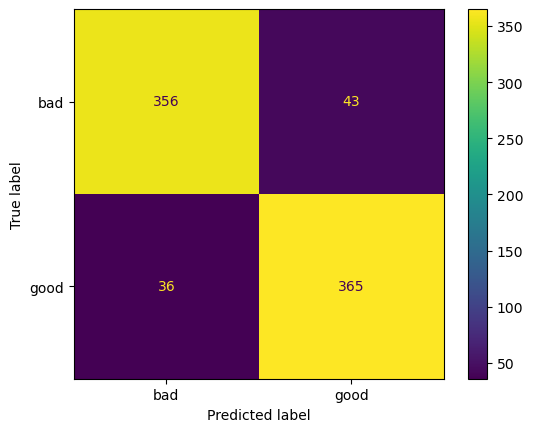

In [14]:
i=ConfusionMatrixDisplay(cm,display_labels=knn_.classes_)
i.plot()

# Metrics

# Classification report

In [20]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

         bad       0.91      0.89      0.90       399
        good       0.89      0.91      0.90       401

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



# Deployment of model

In [43]:
pickle.dump(knn_,open(r'C:\Users\srava\Downloads\Apple_quality.pkl','wb'))

In [47]:
final_model = pickle.load(open(r"C:\Users\srava\Downloads\Apple_quality.pkl",'rb'))''

In [61]:
def test():
    test_point = int(input())
    result = knn_.predict(x_test.iloc[[test_point]])
    return result[0]
    

In [63]:
predi = final_model.predict([[0.309,-1.49,0.616,2.018,-0.776,-1.543,-1.378]])

C:\Users\srava\sravanpython\anakonda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [64]:
predi

array(['bad'], dtype=object)